In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

## Perform API Calls

In [3]:
# OpenWeatherMap API Key
api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="

# set up lists to hold reponse info
lat = []
temp = []
city_name = []
country = []
humidity = []
cloudiness = []
windspeed = []


# Loop through the list of cities and perform a request for data on each
print("Data Retrieval")

row_count = 0

for city in cities:
    query_url = url  + city
    response = requests.get(query_url).json()
    if response["cod"] == "404":
        print("No city record found. Skipping....")
    
    else:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
    
    
    print("---------------------------------------------------")
    try:
        print("Proceesing: Record # " , row_count, ' | ' , response["name"], response['sys']['country'],'|' , response["id"])
        print(query_url)
    except KeyError: 
        print("Proceesing: Record # " , row_count, ' | ' , " City name not found on server")
        print(query_url)
        
    
    row_count += 1
    
print("---------------------------------------------------")    
print("Data Retrieval Complete")
print("---------------------------------------------------")
    

Data Retrieval
---------------------------------------------------
Proceesing: Record #  0  |  Tari NG | 2322495
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=tari
---------------------------------------------------
Proceesing: Record #  1  |  Busselton AU | 2075265
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=busselton
---------------------------------------------------
Proceesing: Record #  2  |  Bambous Virieux MU | 1106677
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=bambous virieux
---------------------------------------------------
Proceesing: Record #  3  |  Samarai PG | 2132606
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=samarai
---------------------------------------------------
Proceesing: Record #  4  |  Rikitea PF | 4030556
http://api.openweather

No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  37  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=satitoa
---------------------------------------------------
Proceesing: Record #  38  |  Puerto Ayora EC | 3652764
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=puerto ayora
---------------------------------------------------
Proceesing: Record #  39  |  Norman Wells CA | 6089245
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=norman wells
---------------------------------------------------
Proceesing: Record #  40  |  Ban Mo TH | 1608900
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ban mo
---------------------------------------------------
Proceesing: Record #  41  |  Arra

---------------------------------------------------
Proceesing: Record #  75  |  Henties Bay NA | 3356832
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=henties bay
---------------------------------------------------
Proceesing: Record #  76  |  Byron Bay AU | 2172880
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=byron bay
---------------------------------------------------
Proceesing: Record #  77  |  Saint-Philippe CA | 6138908
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=saint-philippe
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  78  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=urumqi
No city record found. Skipping....
-------------------------------------------

---------------------------------------------------
Proceesing: Record #  114  |  Ponta do Sol BR | 3453439
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ponta do sol
---------------------------------------------------
Proceesing: Record #  115  |  Kapaa US | 5848280
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=kapaa
---------------------------------------------------
Proceesing: Record #  116  |  Teya MX | 3526662
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=teya
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  117  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=karakendzha
---------------------------------------------------
Proceesing: Record #  118  |  Carnarvon ZA 

---------------------------------------------------
Proceesing: Record #  154  |  Dikson RU | 1507390
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=dikson
---------------------------------------------------
Proceesing: Record #  155  |  Loukhi RU | 533964
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=loukhi
---------------------------------------------------
Proceesing: Record #  156  |  Pokhara NP | 1282898
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=pokhara
---------------------------------------------------
Proceesing: Record #  157  |  Bandarbeyla SO | 64814
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=bandarbeyla
---------------------------------------------------
Proceesing: Record #  158  |  Smithers CA | 6149996
http://api.openweathermap.org/data/2.5/

---------------------------------------------------
Proceesing: Record #  192  |  Lorengau PG | 2092164
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=lorengau
---------------------------------------------------
Proceesing: Record #  193  |  Cidreira BR | 3466165
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=cidreira
---------------------------------------------------
Proceesing: Record #  194  |  Brits ZA | 1015621
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=brits
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  195  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=koboldo
---------------------------------------------------
Proceesing: Record #  196  |  Niquelandia BR | 

---------------------------------------------------
Proceesing: Record #  230  |  Yumen CN | 1528998
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=yumen
---------------------------------------------------
Proceesing: Record #  231  |  Singaraja ID | 1626932
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=singaraja
---------------------------------------------------
Proceesing: Record #  232  |  Sitka US | 4267710
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=sitka
---------------------------------------------------
Proceesing: Record #  233  |  Aksu KZ | 1524298
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=aksu
---------------------------------------------------
Proceesing: Record #  234  |  Saint George GR | 262462
http://api.openweathermap.org/data/2.5/weather?

---------------------------------------------------
Proceesing: Record #  269  |  Margate AU | 2158744
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=margate
---------------------------------------------------
Proceesing: Record #  270  |  Ilulissat GL | 3423146
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ilulissat
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  271  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ruatoria
---------------------------------------------------
Proceesing: Record #  272  |  Esperance TT | 3573739
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=esperance
No city record found. Skipping....
---------------------------------------------------
Pro

---------------------------------------------------
Proceesing: Record #  308  |  Gawler AU | 2071059
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=gawler
---------------------------------------------------
Proceesing: Record #  309  |  Yenagoa NG | 2318123
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=yenagoa
---------------------------------------------------
Proceesing: Record #  310  |  Dwarka IN | 1273294
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=dwarka
---------------------------------------------------
Proceesing: Record #  311  |  Ballina IE | 2966778
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ballina
---------------------------------------------------
Proceesing: Record #  312  |  Mogadishu SO | 53654
http://api.openweathermap.org/data/2.5/weathe

No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  345  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=barentsburg
---------------------------------------------------
Proceesing: Record #  346  |  Kungurtug RU | 1501377
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=kungurtug
---------------------------------------------------
Proceesing: Record #  347  |  Kaupanger NO | 7288345
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=kaupanger
---------------------------------------------------
Proceesing: Record #  348  |  Soldotna US | 5874678
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=soldotna
---------------------------------------------------
Proceesing: Record #  349  |  Cla

---------------------------------------------------
Proceesing: Record #  382  |  Iranshahr IR | 1160939
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=iranshahr
---------------------------------------------------
Proceesing: Record #  383  |  Ciudad Bolivar VE | 3645532
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ciudad bolivar
---------------------------------------------------
Proceesing: Record #  384  |  Aksarka RU | 1512019
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=aksarka
---------------------------------------------------
Proceesing: Record #  385  |  Buchanan LR | 2278158
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=buchanan
---------------------------------------------------
Proceesing: Record #  386  |  Kandrian PG | 2094746
http://api.openweath

---------------------------------------------------
Proceesing: Record #  420  |  Loandjili CG | 2258378
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=loandjili
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  421  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=burica
---------------------------------------------------
Proceesing: Record #  422  |  Dombarovskiy RU | 565407
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=dombarovskiy
---------------------------------------------------
Proceesing: Record #  423  |  Trincomalee LK | 1226260
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=trincomalee
---------------------------------------------------
Proceesing: Record #  424  

---------------------------------------------------
Proceesing: Record #  458  |  Isfana KG | 1222662
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=isfana
---------------------------------------------------
Proceesing: Record #  459  |  Makakilo City US | 5850554
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=makakilo city
---------------------------------------------------
Proceesing: Record #  460  |  Woodward US | 4556050
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=woodward
---------------------------------------------------
Proceesing: Record #  461  |  Lesnoy RU | 535734
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=lesnoy
---------------------------------------------------
Proceesing: Record #  462  |  Novobureyskiy RU | 2018964
http://api.openweathermap.

Proceesing: Record #  495  |  Kuytun RU | 2021093
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=kuytun
---------------------------------------------------
Proceesing: Record #  496  |  Conakry GN | 2422465
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=conakry
---------------------------------------------------
Proceesing: Record #  497  |  Broome GB | 2656067
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=broome
---------------------------------------------------
Proceesing: Record #  498  |  Portel PT | 2263974
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=portel
---------------------------------------------------
Proceesing: Record #  499  |  Dongying CN | 1812101
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa

---------------------------------------------------
Proceesing: Record #  533  |  Vredendal ZA | 3359736
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=vredendal
---------------------------------------------------
Proceesing: Record #  534  |  Kutum SD | 371745
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=kutum
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  535  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=privokzalnyy
---------------------------------------------------
Proceesing: Record #  536  |  Parang PH | 1694775
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=parang
---------------------------------------------------
Proceesing: Record #  537  |  Yar-Sale RU | 1

---------------------------------------------------
Proceesing: Record #  572  |  Gat SN | 2249901
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=gat
---------------------------------------------------
Proceesing: Record #  573  |  Minot US | 5690532
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=minot
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  574  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=assela
---------------------------------------------------
Proceesing: Record #  575  |  Kudahuvadhoo MV | 1337607
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=kudahuvadhoo
---------------------------------------------------
Proceesing: Record #  576  |  Tigil RU | 2120612
h

---------------------------------------------------
Proceesing: Record #  611  |  Lethem GY | 3379316
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=lethem
---------------------------------------------------
Proceesing: Record #  612  |  Northam GB | 2641434
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=northam
No city record found. Skipping....
---------------------------------------------------
Proceesing: Record #  613  |   City name not found on server
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=karaul
---------------------------------------------------
Proceesing: Record #  614  |  Ambatofinandrahana MG | 1083239
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ed585d7738ddcf631470fb88f392aa1b&q=ambatofinandrahana
---------------------------------------------------
Proceesing: Record #  615  |

In [4]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "City": city_name,
    "Country": country,
    "Latitude": lat,
    "Temperature (F)": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "WindSpeed": windspeed
}

weather_data = pd.DataFrame(weather_dict)
weather_data.count()

City               564
Country            564
Latitude           564
Temperature (F)    564
Humidity           564
Cloudiness         564
WindSpeed          564
dtype: int64

In [ ]:
weather_data.head()

In [6]:
# Save data to a CSV file
weather_data.to_csv("WeatherPy_analysis/City_Data.csv")

In [7]:
#Set up variables for current date
now = time.localtime(time.time())
date = time.strftime("%m/%d/%y", now)

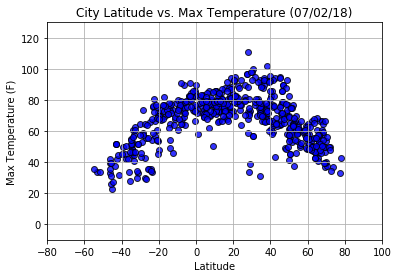

In [13]:
#Build a scatter plot for Latitude vs. Temperature

plt.scatter(weather_data["Latitude"], 
            weather_data["Temperature (F)"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({date})")      
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-10, 130])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Temperature.png")

# Show plot
plt.show()


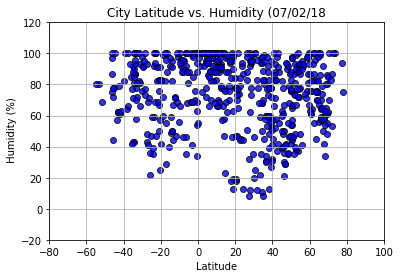

In [9]:
#Build a scatter plot for Latitude vs. Humidity

plt.scatter(weather_data["Latitude"], 
            weather_data["Humidity"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({date}")      
plt.ylabel(" Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Humidity.png")

# Show plot
plt.show()

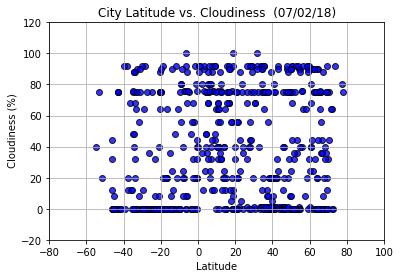

In [10]:
#Build a scatter plot for Latitude vs. Cloudiness

plt.scatter(weather_data["Latitude"], 
            weather_data["Cloudiness"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness  ({date})")      
plt.ylabel(" Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-20, 120])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Cloudiness.png")

# Show plot
plt.show()

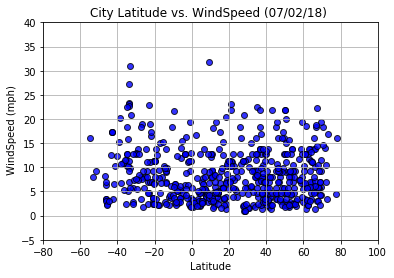

In [15]:
#Build a scatter plot for Latitude vs. Windspeed

plt.scatter(weather_data["Latitude"], 
            weather_data["WindSpeed"], c="blue",
            edgecolor="black", linewidths=1, marker="o",
             alpha=0.8, label="City")


# Incorporate the other graph properties
plt.title(f"City Latitude vs. WindSpeed ({date}) ")      
plt.ylabel(" WindSpeed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-80, 100])
plt.ylim([-5, 40])


# Save the figure
plt.savefig("WeatherPy_analysis/Latitude_Windspeed.png")

# Show plot
plt.show()


# WeatherPy - Analysis:


1. Even though the dataset is based on a random and uniform distribution of generated coordinates, most of the cities from the data retrieval process lie in the northern hemishphere. This however correlates with the fact that 90% of the world population live in cities in the northern hemisphere.


2. The highest temperatures lie between latitudes -20 and 40 degrees. This confirms the fact that the closer you move to the Equator, which lies on latitude 0 degrees, the warmer it gets. Based on the data, the highest temperatures are in the northern hemishpere which currently is experiencing  its summer season. In stark contrast, the southern hemisphere is just beginning its winter season and temperatures will continue to dip as the months move along. As is the case, the plotted data shows that the lowest temperature among the generated records is in the southern hemisphere.


3. Humidity is a concentration of water vapor in the air. From the plotted data, there is almost no difference in humidity levels across the two hemispheres. Rather, most cities in the generated dataset are all currently experiencing 60% and above humidity levels. This signifies a lot of water vapor in the atmosphere which should result in increased precipation as is the case now across many places in Africa, Asia and North America.
